# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [175]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [176]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [177]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

city_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

city_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [178]:
# 2. Get the total drivers for each city type
total_drivers = (city_data_df.groupby(["type"]).sum()["driver_count"])
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [179]:
#  3. Get the total amount of fares for each city type
total_city_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
total_urban_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [180]:
#  4. Get the average fare per ride for each city type. 
average_city_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
average_city_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [181]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_city_fare/total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [182]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame({"Total Rides":city_ride_count, "Total Drivers": total_city_fare, "Total Fare": total_city_fare, "Average Fare Per Ride": average_city_fare, "Average Fare Per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,4327.93,4327.93,34.623440,55.486282
Suburban,625,19356.33,19356.33,30.970128,39.502714
Urban,1625,39854.38,39854.38,24.525772,16.571468


In [183]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [184]:
#  8. Format the columns.
pyber_summary_df["Total Fare"] = pyber_summary_df["Total Fare"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare Per Ride,Average Fare Per Driver
Rural,125,4327.93,"$4,327.93",$34.62,$55.49
Suburban,625,19356.33,"$19,356.33",$30.97,$39.50
Urban,1625,39854.38,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [232]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [209]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_fares_sum_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
pyber_fares_sum_df

type   date            
Rural  2019-01-01 9:45     43.69
       2019-01-02 11:18    52.12
       2019-01-03 19:51    19.90
       2019-01-04 3:31     24.88
       2019-01-06 7:38     47.33
                           ...  
Urban  2019-05-08 1:54     32.69
       2019-05-08 2:31     41.33
       2019-05-08 4:20     21.99
       2019-05-08 4:39     18.45
       2019-05-08 7:29     18.55
Name: fare, Length: 2364, dtype: float64

In [233]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_index_df = pyber_fares_sum_df.reset_index()
pyber_index_df.head(10)

,type,date,fare
0,Rural,2019-01-01 9:45,43.69
1,Rural,2019-01-02 11:18,52.12
2,Rural,2019-01-03 19:51,19.90
3,Rural,2019-01-04 3:31,24.88
4,Rural,2019-01-06 7:38,47.33
5,Rural,2019-01-08 6:19,19.39
6,Rural,2019-01-09 15:30,31.84
7,Rural,2019-01-11 4:39,16.42
8,Rural,2019-01-14 15:58,54.10
9,Rural,2019-01-14 7:09,18.05


In [234]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_date_df = pd.pivot_table (pyber_index_df, index=["date"], columns = 'type', values='fare')
pyber_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-05-08 1:54,NaN,NaN,32.69
2019-05-08 2:31,NaN,NaN,41.33
2019-05-08 4:20,NaN,NaN,21.99


In [235]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_given_dates_df = pyber_date_df.loc['2019-01-01':'2019-04-29']
pyber_given_dates_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31


In [236]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_given_dates_df.index = pd.to_datetime(pyber_given_dates_df.index)
pyber_given_dates_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00


In [237]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_given_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [242]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_last_df = pyber_given_dates_df.resample("W").sum()
#pyber_last_df = pyber_given_dates_df.resample("M", on='date').sum()
pyber_last_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


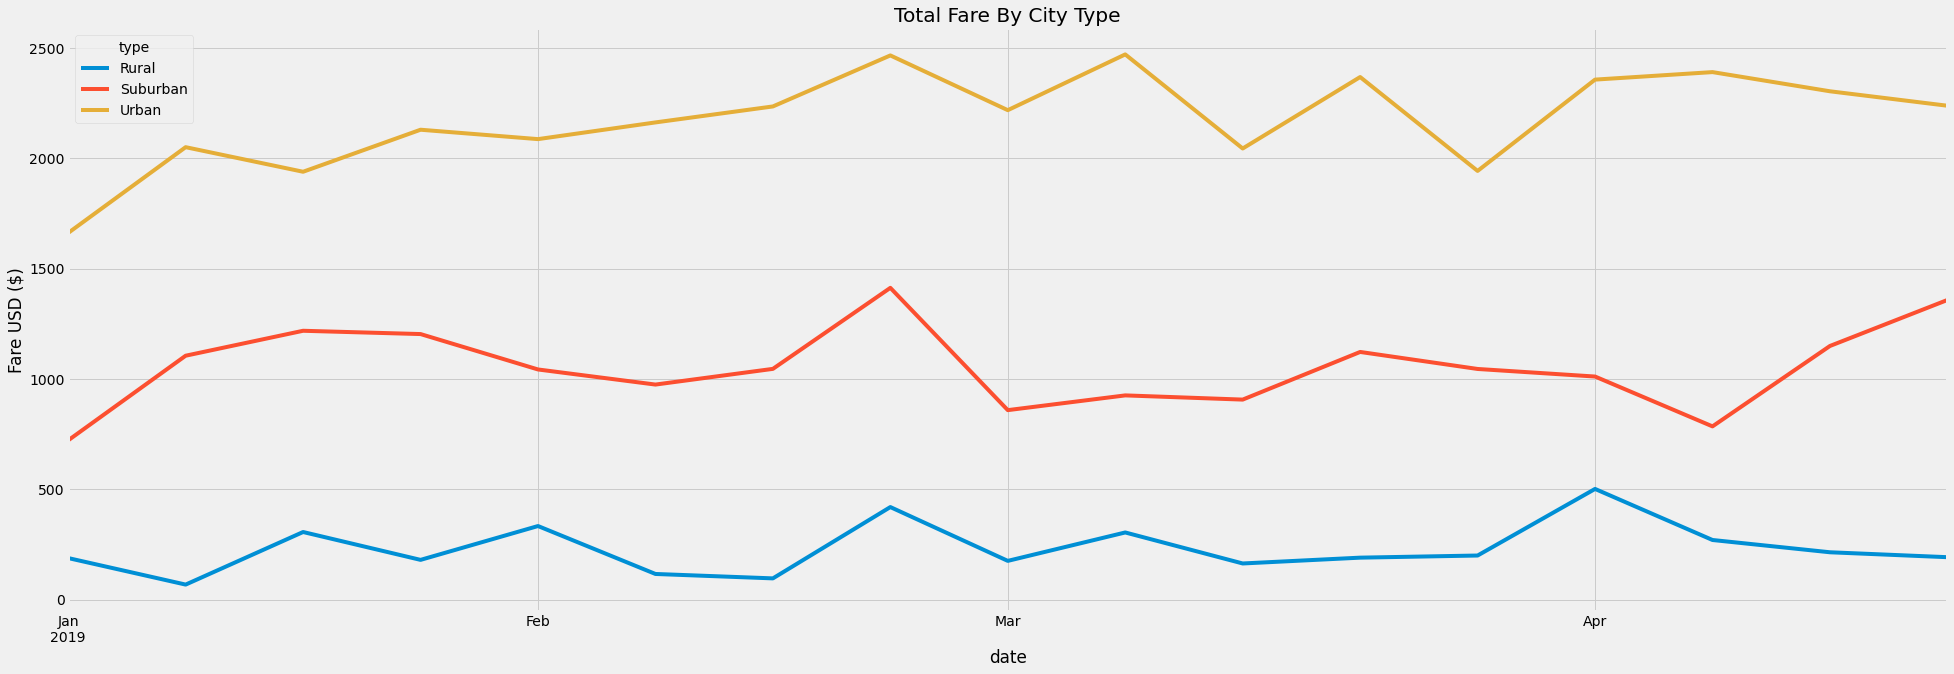

In [257]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



ax = pyber_last_df.plot(figsize=(30, 10))
plt.title("Total Fare By City Type")
plt.ylabel("Fare USD ($)")

plt.show

plt.savefig("Analysis/PyBer_fare_summary.png")